In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Ejercicio N°5**

El dataset `wine_quality.xlsx` contiene información acerca del puntaje que un panel de enólogos asignó a una serie de 76 vinos de tipo Pinot Noir. Las cualidades evaluadas incluyeron algunas propiedades organolépticas como claridad (*clarity*), aroma (*aroma*), cuerpo (*body*) y sabor (*flavor*) y una valoración de la calidad general del vino (*quality*). Adicionalmente, se recabó información sobre el grado de envejecimiento (*aging*) de cada uno de los productos evaluados, la cual se encuentra en el dataset `aging.csv`.

1. Importe ambos datasets y realice cualquier tarea de limpieza y adecuación de los mismos que
considere necesaria para su posterior análisis.




In [ ]:
quality = pd.read_excel("/content/wine_quality.xlsx")
quality.head(5)

,Wine Quality Data. This dataset contains data on taste-testing 76 brands of pinot noir wine,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"(first reported in an article by Kwan, Kowalsk...",NaN,NaN,NaN,NaN,NaN
1,id,clarity,aroma,body,flavor,quality
2,1,1,3.3,2.8,3.1,9;8
3,2,1,4.4,4.9,3.5,12;6
4,3,1,3.9,5.3,4.8,11;9


In [ ]:
quality = pd.read_excel("/content/wine_quality.xlsx",header=2, index_col=0)
quality.tail()

,clarity,aroma,body,flavor,quality
id,,,,,
72,0.8,1.9,5.7,2.2,7;5
73,0.9,3.3,4.7,5.0,11;1
74,1.2,4.6,3.4,6.0,12;1
75,0.8,3.8,5.3,5.0,13;2
76,0.9,3.1,5.0,6.7,16;9


In [ ]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 76
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   clarity  77 non-null     float64
 1   aroma    77 non-null     float64
 2   body     77 non-null     float64
 3   flavor   77 non-null     float64
 4   quality  77 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.6+ KB


In [ ]:
quality.head()

,clarity,aroma,body,flavor,quality
id,,,,,
1,1.0,3.3,2.8,3.1,9;8
2,1.0,4.4,4.9,3.5,12;6
3,1.0,3.9,5.3,4.8,11;9
4,1.0,3.9,2.6,3.1,11;1
4,1.0,3.9,2.6,3.1,11;1


In [ ]:
aging = pd.read_csv("/content/wine_aging.csv")
aging.head(5)

,WINE_id;aging
0,1;crianza
1,2;crianza
2,3;reserva
3,4;crianza
4,5;gran reserva


In [ ]:
aging = pd.read_csv("/content/wine_aging.csv", sep=";", index_col=0)
aging.head(5)

,aging
WINE_id,
1,crianza
2,crianza
3,reserva
4,crianza
5,gran reserva


In [ ]:
aging.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 1 to 76
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aging   76 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB


In [ ]:
aging.tail()

,aging
WINE_id,
72,crianza
73,reserva
74,gran reserva
75,reserva
76,reserva


In [ ]:
print(f"Cantidad de filas:\nQuality: {len(quality)} \nAging: {len(aging)}")

Cantidad de filas:
Quality: 77 
Aging: 76


quality tiene una fila más?? rarooooo

In [ ]:
quality.index.equals(aging.index) # si es True coincide el index

False

In [ ]:
quality[quality.index.duplicated(keep=False)]

,clarity,aroma,body,flavor,quality
id,,,,,
4,1.0,3.9,2.6,3.1,11;1
4,1.0,3.9,2.6,3.1,11;1


la fila con id 4 se repite

In [ ]:
aging[aging.index.duplicated(keep=False)]

,aging
WINE_id,


In [ ]:
#borramos la fila con index 4 y nos quedamos con la primera
quality = quality[~quality.index.duplicated(keep='first')]

In [ ]:
print(f"Cantidad de filas:\nQuality: {len(quality)} \nAging: {len(aging)}")

Cantidad de filas:
Quality: 76 
Aging: 76


In [ ]:
quality.index.equals(aging.index) # si es True coincide el index
madres.index.equals(nac.index)

True

In [ ]:
wines = pd.concat([quality, aging], axis=1)
df = pd.concat([madres, nac], axis=1)

In [ ]:
wines

,clarity,aroma,body,flavor,quality,aging
1,1.0,3.3,2.8,3.1,9;8,crianza
2,1.0,4.4,4.9,3.5,12;6,crianza
3,1.0,3.9,5.3,4.8,11;9,reserva
4,1.0,3.9,2.6,3.1,11;1,crianza
5,1.0,5.6,5.1,5.5,13;3,gran reserva
...,...,...,...,...,...,...
72,0.8,1.9,5.7,2.2,7;5,crianza
73,0.9,3.3,4.7,5.0,11;1,reserva
74,1.2,4.6,3.4,6.0,12;1,gran reserva
75,0.8,3.8,5.3,5.0,13;2,reserva


In [ ]:
# buscando el tipo de vino con mayor mediana para el sabor encontramos que existen valores que están mal
# Reserva y reserva / gran reserva y granreserva
wines["aging"] = wines["aging"].replace({
    "granreserva" : "Gran Reserva",
    "gran reserva": "Gran Reserva",
    "reserva"     : "Reserva",
    "crianza"     : "Crianza"
})

In [ ]:
# siguiendo con el proceso de limpieza, quality se presenta con formato string "12;5"
# se toma la decisión de asumir que el punto y coma es en realidad una coma
# por lo tanto se la reemplaza por una coma y luego se transforma la columna a float
wines["quality"] = wines["quality"].astype(str).str.replace(";", ".").astype("float")

2. ¿Cuál es el tipo de vino (crianza/reserva/gran reserva) que presenta la mayor mediana para el sabor?

In [ ]:
tipoxflavorxmedians = wines.groupby("aging")["flavor"].median()
print(f"El tipo de vino que presenta mayor mediana para el sabor es:\n{tipoxflavorxmedians.idxmax()}")

El tipo de vino que presenta mayor mediana para el sabor es:
Gran Reserva


3. Construya la matriz de covariancia de las distintas variables cuantitativas que componen el
dataset y comente qué tipo de información le aporta acerca de la relación entre los distintos
pares de variables cuantitativas del dataset.

In [ ]:
cov_matriz = wines.select_dtypes(include='float64').cov()
print(cov_matriz)

          clarity     aroma      body    flavor   quality
clarity  0.016272  0.008600 -0.017854  0.025598  0.017756
aroma    0.008600  1.361200  0.231933  0.479267  0.993133
body    -0.017854  0.231933  0.694784  0.143374  0.428275
flavor   0.025598  0.479267  0.143374  1.261423  1.238037
quality  0.017756  0.993133  0.428275  1.238037  4.558588


4. Construya la matriz de correlación de las distintas variables cuantitativas que componen el
dataset. En base al mismo, identifique la/s variable/s que se encuentran más fuertemente
correlacionadas e informe e interprete la medida de asociación lineal correspondiente

In [ ]:
corr_matriz = wines.select_dtypes("float64").corr()
print(corr_matriz)

          clarity     aroma      body    flavor   quality
clarity  1.000000  0.057785 -0.167919  0.178674  0.065195
aroma    0.057785  1.000000  0.238494  0.365751  0.398686
body    -0.167919  0.238494  1.000000  0.153149  0.240648
flavor   0.178674  0.365751  0.153149  1.000000  0.516283
quality  0.065195  0.398686  0.240648  0.516283  1.000000


En base a la anterior tabla es posible distinguir que el par de variables con mayor correlación, en este caso positiva, es quality y flavor. Es una correlación moderada del 0.51

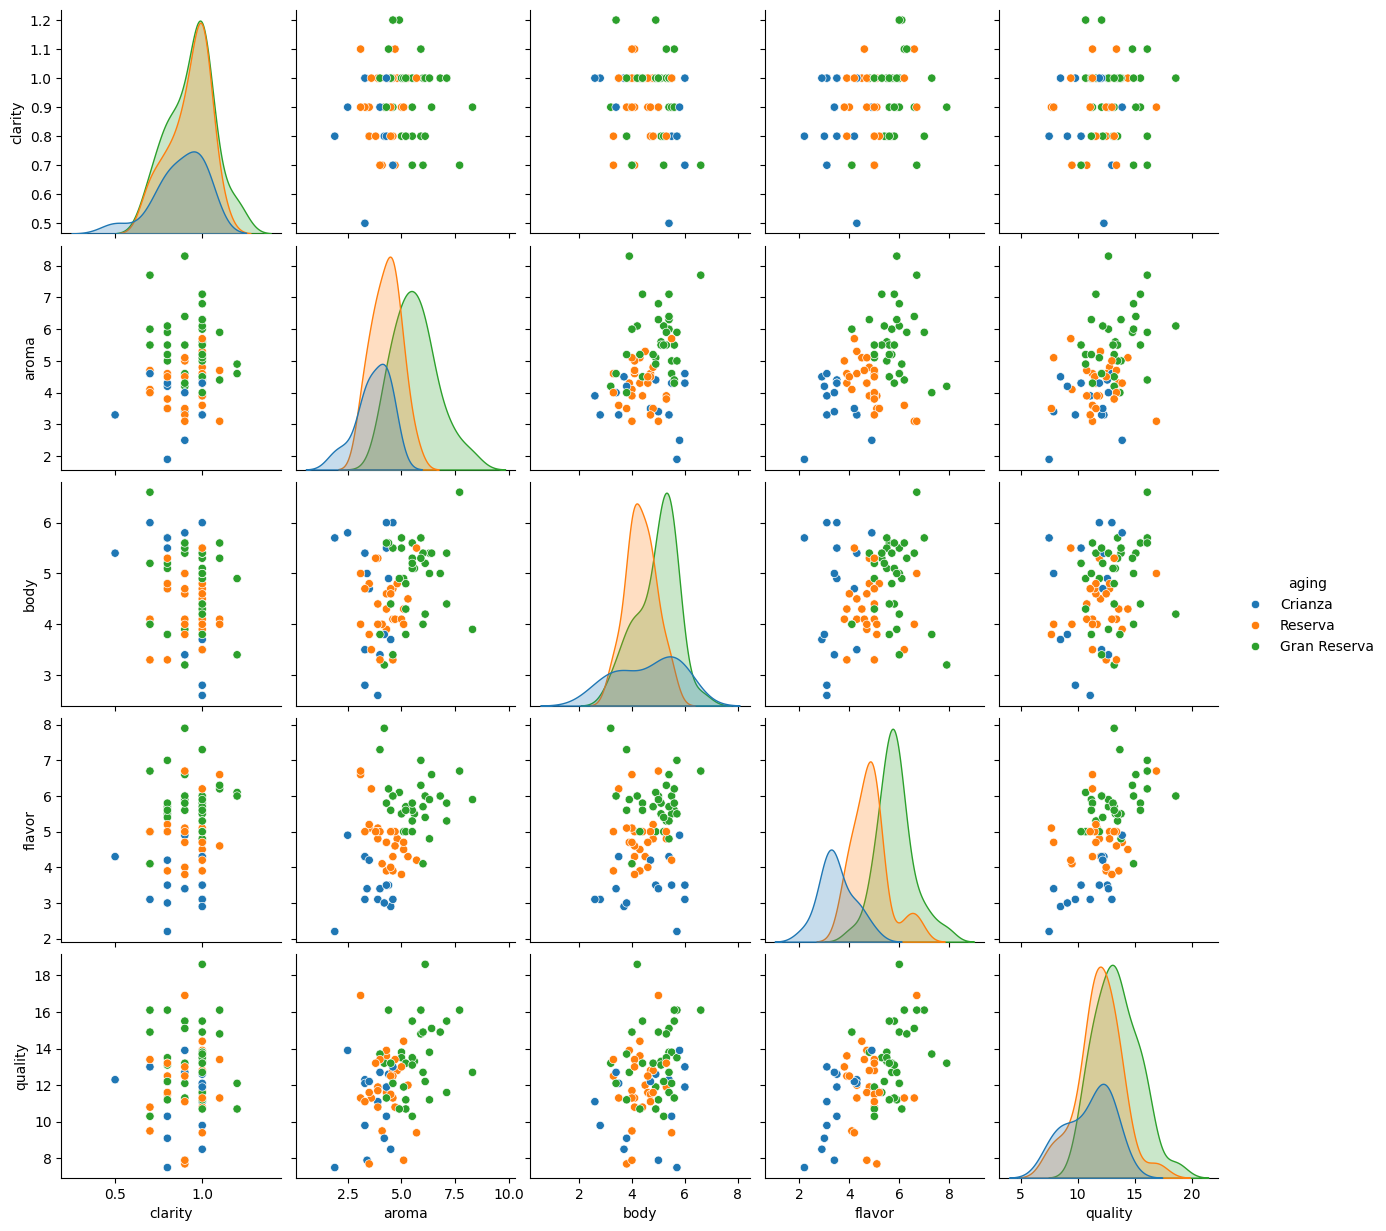

In [ ]:
sns.pairplot(data=wines, hue='aging', diag_kind='kde')

5. Elija el par de variables que identificó en el ítem anterior como aquellas que se encuentran más fuertemente correlacionadas linealmente y realice un gráfico que le permita visualizar la relación general que existe entre las mismas.

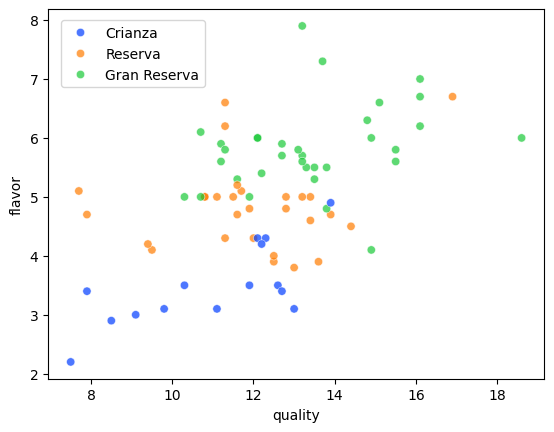

In [ ]:
#plt.figure(figsize=(5,5))
sns.scatterplot(wines, x="quality", y="flavor", hue="aging", palette="bright", alpha=0.7)
plt.legend(bbox_to_anchor=(0.33,0.77 ),loc='lower right')

plt.show()

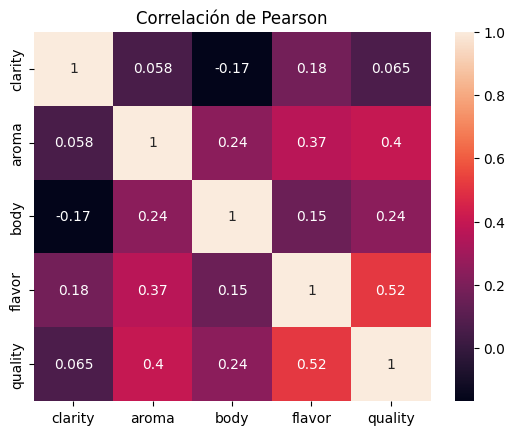

In [ ]:
sns.heatmap(wines.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlación de Pearson')
plt.show()

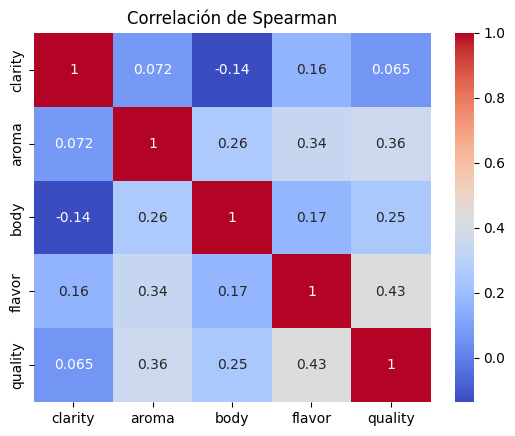

In [ ]:
sns.heatmap(wines.select_dtypes(include='number').corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Correlación de Spearman')
plt.show()